In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
#读入数据
data = np.genfromtxt("longley.csv",delimiter=",")
print(data)

[[     nan      nan      nan      nan      nan      nan      nan      nan]
 [     nan   83.     234.289  235.6    159.     107.608 1947.      60.323]
 [     nan   88.5    259.426  232.5    145.6    108.632 1948.      61.122]
 [     nan   88.2    258.054  368.2    161.6    109.773 1949.      60.171]
 [     nan   89.5    284.599  335.1    165.     110.929 1950.      61.187]
 [     nan   96.2    328.975  209.9    309.9    112.075 1951.      63.221]
 [     nan   98.1    346.999  193.2    359.4    113.27  1952.      63.639]
 [     nan   99.     365.385  187.     354.7    115.094 1953.      64.989]
 [     nan  100.     363.112  357.8    335.     116.219 1954.      63.761]
 [     nan  101.2    397.469  290.4    304.8    117.388 1955.      66.019]
 [     nan  104.6    419.18   282.2    285.7    118.734 1956.      67.857]
 [     nan  108.4    442.769  293.6    279.8    120.445 1957.      68.169]
 [     nan  110.8    444.546  468.1    263.7    121.95  1958.      66.513]
 [     nan  112.6    482.

In [5]:
#切分数据
x_data = data[1:,2:]
y_data = data[1:,1]
print(x_data)
print(y_data)

[[ 234.289  235.6    159.     107.608 1947.      60.323]
 [ 259.426  232.5    145.6    108.632 1948.      61.122]
 [ 258.054  368.2    161.6    109.773 1949.      60.171]
 [ 284.599  335.1    165.     110.929 1950.      61.187]
 [ 328.975  209.9    309.9    112.075 1951.      63.221]
 [ 346.999  193.2    359.4    113.27  1952.      63.639]
 [ 365.385  187.     354.7    115.094 1953.      64.989]
 [ 363.112  357.8    335.     116.219 1954.      63.761]
 [ 397.469  290.4    304.8    117.388 1955.      66.019]
 [ 419.18   282.2    285.7    118.734 1956.      67.857]
 [ 442.769  293.6    279.8    120.445 1957.      68.169]
 [ 444.546  468.1    263.7    121.95  1958.      66.513]
 [ 482.704  381.3    255.2    123.366 1959.      68.655]
 [ 502.601  393.1    251.4    125.368 1960.      69.564]
 [ 518.173  480.6    257.2    127.852 1961.      69.331]
 [ 554.894  400.7    282.7    130.081 1962.      70.551]]
[ 83.   88.5  88.2  89.5  96.2  98.1  99.  100.  101.2 104.6 108.4 110.8
 112.6 114.2 1

In [7]:
#创建模型
#生成50个值
alphas_to_test = np.linspace(0.001,1)#默认50个值
#创建模型，保存误差值
model = linear_model.RidgeCV(alphas=alphas_to_test,store_cv_values=True)
model.fit(x_data,y_data)

#领系数
print(model.alpha_)

#loss值
print(model.cv_values_.shape)

0.40875510204081633
(16, 50)


In [8]:
model.cv_values_

array([[1.34072103e+00, 1.27561414e+00, 1.23262714e+00, 1.20413381e+00,
        1.18561728e+00, 1.17423737e+00, 1.16812114e+00, 1.16598468e+00,
        1.16691902e+00, 1.17026299e+00, 1.17552433e+00, 1.18232917e+00,
        1.19038855e+00, 1.19947569e+00, 1.20941021e+00, 1.22004686e+00,
        1.23126748e+00, 1.24297495e+00, 1.25508881e+00, 1.26754186e+00,
        1.28027755e+00, 1.29324804e+00, 1.30641258e+00, 1.31973631e+00,
        1.33318924e+00, 1.34674546e+00, 1.36038253e+00, 1.37408090e+00,
        1.38782353e+00, 1.40159548e+00, 1.41538367e+00, 1.42917656e+00,
        1.44296401e+00, 1.45673705e+00, 1.47048777e+00, 1.48420916e+00,
        1.49789500e+00, 1.51153980e+00, 1.52513868e+00, 1.53868732e+00,
        1.55218188e+00, 1.56561897e+00, 1.57899559e+00, 1.59230908e+00,
        1.60555710e+00, 1.61873759e+00, 1.63184874e+00, 1.64488896e+00,
        1.65785690e+00, 1.67075134e+00],
       [6.42617451e+00, 6.43602265e+00, 6.44595583e+00, 6.45587623e+00,
        6.46572381e+00,

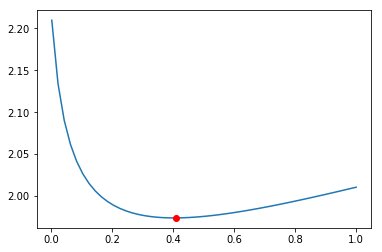

In [9]:
#画图
#岭系数跟loss值的关系
plt.plot(alphas_to_test,model.cv_values_.mean(axis = 0))

#选取的岭系数值的位置
plt.plot(model.alpha_,min(model.cv_values_.mean(axis = 0)),'ro')
plt.show()

In [10]:
model.predict(x_data[2,np.newaxis])

array([88.11216213])